# Filtering Streams
The following code illustrates how we can use hashes to test membership in a list.

In [1]:
import numpy as np

In [2]:
def my_hash(item, nbuckets):
    "Return a hash value between 0 and nbuckets - 1"
    return hash(item) % nbuckets

In [3]:
my_hash("Peter", 1000)

957

In [4]:
my_hash("Mary", 1000)

172

In [5]:
my_hash('Susan', 1000)

717

In [6]:
my_hash('John', 1000)

969

In [7]:
# Building the filter
NBUCKETS = 1000
S = ['John', 'Mary', 'Peter', 'Susan']
hash_filter = np.zeros(NBUCKETS, dtype=np.bool)
for s in S:
    hash_filter[my_hash(s, NBUCKETS)] = 1

In [8]:
# Testing the filter
def in_filter(item):
    "Return True if the item is in the filter"
    return hash_filter[my_hash(item, NBUCKETS)] == 1

In [9]:
in_filter("John")

True

In [10]:
in_filter("Diego")

False

## Bloom Filter
The following code implements a Bloom filter

In [11]:
my_hash(("John", 0), 1000)

698

In [12]:
my_hash(("John", 1), 1000)

173

In [13]:
# Building the filter
K = 5 # We use 5 independent hash functions
NBUCKETS = 1000
S = ['John', 'Mary', 'Peter', 'Susan']
hash_filter = np.zeros(NBUCKETS, dtype=np.bool)
for s in S:
    for k in range(K):
        hash_filter[my_hash((s, k), NBUCKETS)] = 1

In [14]:
# Testing the filter
def in_filter(item):
    "Return True if the item is in the filter"
    result = True
    for k in range(K):
        result = result and hash_filter[my_hash((item, k), NBUCKETS)] == 1
    return result

In [15]:
in_filter('John')

True

In [16]:
in_filter('Diego')

False

# The Flajolet-Martin Algorithm
The following algorithm estimates the count of distinct items.

In [17]:
NBUCKETS = 2**32
def tail_length(item):
    "Return the tail length of the hash of the item"
    s = bin(hash(item) % NBUCKETS)
    return len(s) - len(s.rstrip('0'))

In [18]:
print(bin(hash("Phillip") % NBUCKETS))
print(tail_length("Phillip"))

0b1010100100110111110101010000000
7


In [19]:
2**32

4294967296

With one hash function

In [20]:
def count_distinct(stream):
    maxR = 0
    for s in stream:
        r = tail_length(s)
        if r > maxR:
            maxR = r
    return 2**maxR

Let's estimate the number of distinct words in the Brown corpus

In [21]:
import nltk
words = nltk.corpus.brown.words()
len(words)

1161192

In [22]:
count_distinct(words[:10000])

1024

Compare with a brute force exact count:

In [23]:
len(set(words[:10000]))

2690

Variant using multiple hash functions

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

K = 256 # number of distinct hashes
G = 16  # size of each group of hashes
assert K % G == 0 # Check that K is divisible by G

def count_distinct(stream):
    maxR = np.zeros(K) # Initialise all R for all hashes to zero 
    
    # 1. Compute R for each hash
    print("Step 1")
    for s in stream:
        for h in range(K):
            r = tail_length((s, h))
            if r > maxR[h]:
                maxR[h] = r
                
    plt.hist(maxR)
                
    # 2. Combine all R
    print("Step 2")
    Counts = []
    for group in range(K//G):
        groupCounts = []
        for h in range(G):
            groupCounts.append(2**maxR[group*G + h])
        Counts.append(np.median(groupCounts))
    return(np.mean(Counts))

Step 1
Step 2


3392.0

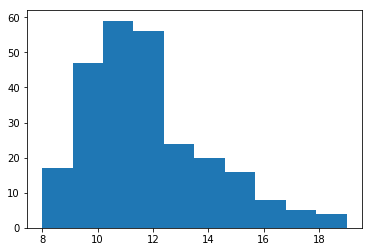

In [25]:
count_distinct(words[:10000])

In [26]:
np.mean([1,2,3,4,10])

4.0

In [27]:
np.median([1,2,3,4,10])

3.0